# HW 1

### Maor Meir Hajaj

### 

### 

###### Have fun!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("cars.csv")
df.head()

,Vehicle Name,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18.0,24.0,3880.0,115.0,197.0,72.0
1,Acura 3.5 RL w/Navigation 4dr,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18.0,24.0,3893.0,115.0,197.0,72.0
2,Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17.0,23.0,4451.0,106.0,189.0,77.0
3,Acura NSX coupe 2dr manual S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17.0,24.0,3153.0,100.0,174.0,71.0
4,Acura RSX Type S 2dr,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24.0,31.0,2778.0,101.0,172.0,68.0


## EX1

In [3]:
weight_mean=df['Weight'].mean()
weight_mean

3577.213615023474

In [4]:
f"'Weight' std: {df['Weight'].std()}\n mean: {weight_mean}"

"'Weight' std: 760.4376627752836\n mean: 3577.213615023474"

In [5]:
df.Weight.fillna(weight_mean,inplace=True)

In [6]:
f"'Weight' std: {df['Weight'].std()}\n mean: {df['Weight'].mean()}"

"'Weight' std: 758.654688076284\n mean: 3577.2136150234746"

## EX2

###### check for nans in 'cyl' and 'hwy mpg' columns

In [7]:
df.isnull().sum()

Vehicle Name        0
Sports Car          0
SUV                 0
Wagon               0
Minivan             0
Pickup              0
AWD                 0
RWD                 0
Retail Price        0
Dealer Cost         0
Engine Size (l)     0
Cyl                 0
HP                  0
City MPG           14
Hwy MPG            14
Weight              0
Wheel Base          2
Len                26
Width              28
dtype: int64

In [8]:
## Hwy MPG    14 nans
df['Hwy MPG'].fillna(df['Hwy MPG'].mean(),inplace=True)
df['Hwy MPG'].isnull().sum()

0

In [9]:
ex2_df=df[['Hwy MPG','Cyl']]
ex2_df.head()

,Hwy MPG,Cyl
0,24.0,6
1,24.0,6
2,23.0,6
3,24.0,6
4,31.0,4


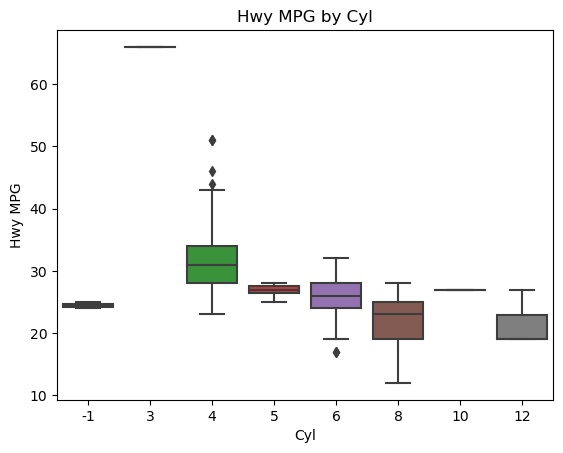

In [10]:
sns.boxplot(x='Cyl',y='Hwy MPG',data=ex2_df)
plt.title('Hwy MPG by Cyl')
plt.savefig('Ex2-Hwy MPG by Cyl.png')
plt.show()

## EX3

In [11]:
# two scatter plots in one figure
# first scatter hp vs city mpg, each cylinder type in a different color
# drop rows with missing values

# second scatter citympg vs hwympg, 3 colors: sport, pickup and other based on the boolean columns 'Sport' and 'Pickup'
df.columns

Index(['Vehicle Name', 'Sports Car', 'SUV', 'Wagon', 'Minivan', 'Pickup',
       'AWD', 'RWD', 'Retail Price', 'Dealer Cost', 'Engine Size (l)', 'Cyl',
       'HP', 'City MPG', 'Hwy MPG', 'Weight', 'Wheel Base', 'Len', 'Width'],
      dtype='object')

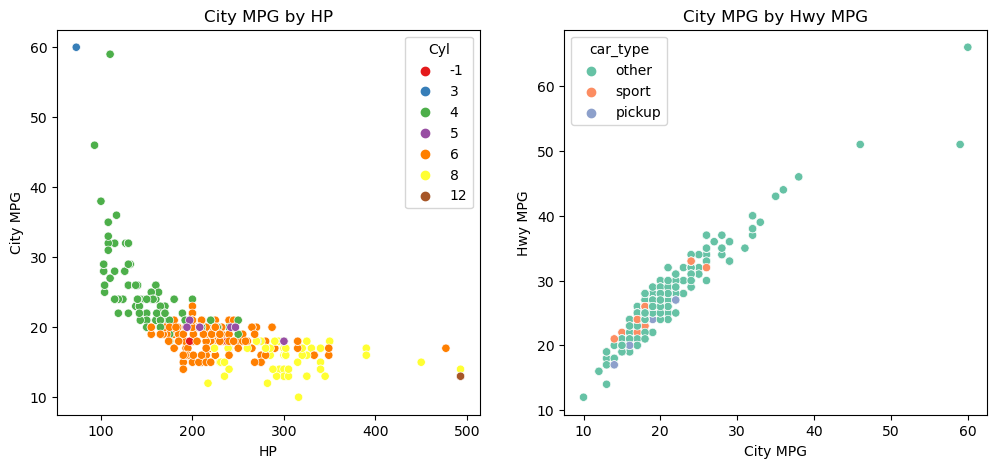

In [12]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ex3_plot1=df[['City MPG','HP','Cyl']].dropna()
sns.scatterplot(x='HP',y='City MPG',hue='Cyl',data=ex3_plot1, ax=ax1,palette='Set1')
ax1.title.set_text('City MPG by HP')
# ---------------
df['car_type']='other'
for i in range(len(df)):
    if df.loc[i,'Sports Car']==True:
        df.loc[i,'car_type']='sport'
    elif df.loc[i,'Pickup']==True:
        df.loc[i,'car_type']='pickup'
ex3_plot2=df[['City MPG','Hwy MPG','car_type']].dropna()
ex3_plot2['City MPG'].fillna(ex3_plot2['City MPG'].mean(),inplace=True)
ex3_plot2['Hwy MPG'].fillna(ex3_plot2['Hwy MPG'].mean(),inplace=True)
sns.scatterplot(x='City MPG',y='Hwy MPG',hue='car_type',
                data=ex3_plot2,ax=ax2,palette='Set2')
ax2.title.set_text('City MPG by Hwy MPG')
# ---------------
plt.savefig('Ex3-Scatter plots.png')
plt.show()

## EX4

In [13]:
ex4_df=df[['City MPG', 'HP', 'Dealer Cost', 'Engine Size (l)']]
print(ex4_df.isnull().sum())
for col in ex4_df.columns:
    if ex4_df[col].isnull().sum()>0:
        ex4_df[col].fillna(ex4_df[col].mean(),inplace=True)

City MPG           14
HP                  0
Dealer Cost         0
Engine Size (l)     0
dtype: int64


/tmp/ipykernel_11818/2870649749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex4_df[col].fillna(ex4_df[col].mean(),inplace=True)


In [14]:
print(ex4_df.isnull().sum())

City MPG           0
HP                 0
Dealer Cost        0
Engine Size (l)    0
dtype: int64


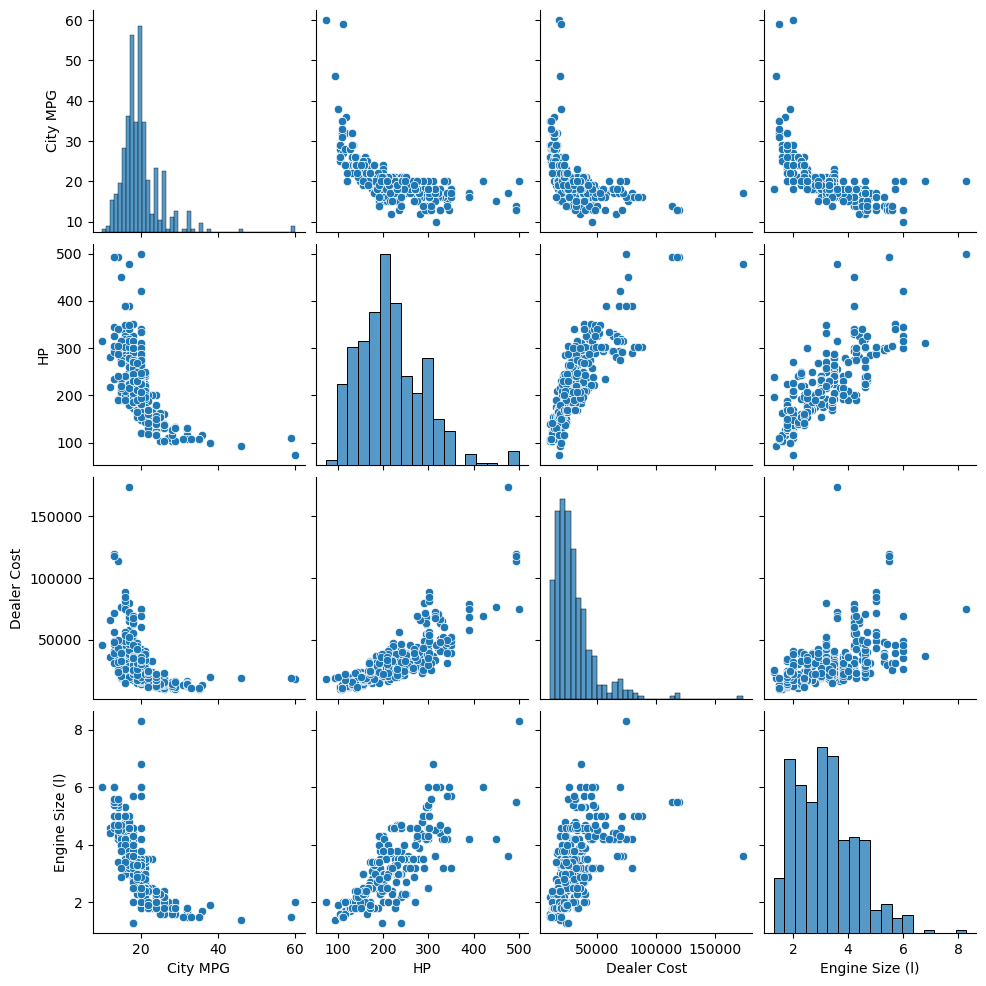

In [15]:
# Scatter matrix all vs 'Dealer Cost'
sns.pairplot(ex4_df)
plt.savefig('Ex4-Scatter matrix.png')
plt.show()